In [1]:
import numpy as np
import pandas as pd 
import os

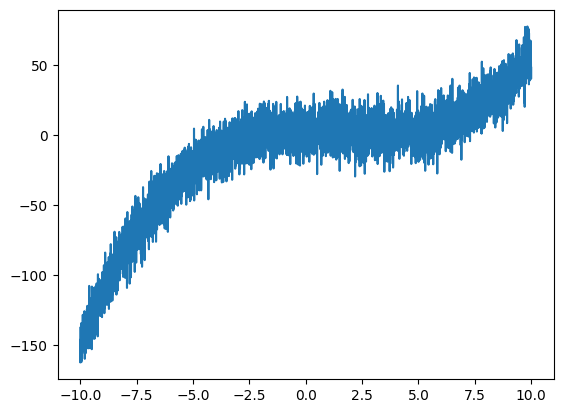

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import time


# -------------------- Task 1: Generate a Complex Non-linear Dataset --------------------
def generate_complex_data(n_samples=5000):
    """
    Task 1: Implement the function to generate a complex non-linear dataset.

    Description:
    Generate a dataset based on a non-linear function with added noise.
    The function is defined as: y = 0.1x^3 - 0.5x^2 + 0.2x + 3 + sin(2x) + noise

    Args:
        n_samples: Number of samples to generate.

    Returns:
        X: Input feature array (n_samples,)
        y: Target values (n_samples,)
    """
    
    # Generate X values
    X = np.linspace(-10, 10, n_samples)
    
    noise = np.random.normal(0, 10, n_samples) # Generate noise randomly from gaussian distribution
    
    # Calculate y values with added noise
    y = (0.1 * X**3) - (0.5 * X**2) + (0.2 * X + 3) + np.sin(2 * X) + noise
    
    return X, y

# Prepare the dataset
X, y = generate_complex_data()
X = X.reshape(-1, 1)  # Reshape X to a 2D array
y = y.reshape(-1, 1)  # Reshape y to a 2D array

plt.plot(X, y)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

# Perform train/test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
# -------------------- Neural Network Class Definition --------------------
class TwoLayerMLP:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        """
        Task 4: Initialize the neural network parameters (weights and biases).

        Description:
        Define and initialize weights and biases for three layers:
            1. Input to Hidden Layer 1
            2. Hidden Layer 1 to Hidden Layer 2
            3. Hidden Layer 2 to Output

        Args:
            input_size: Number of input features.
            hidden1_size: Number of neurons in the first hidden layer.
            hidden2_size: Number of neurons in the second hidden layer.
            output_size: Number of output neurons.
        """
        # TODO: Initialize weights and biases with appropriate dimensions
        self.W1 = np.random.uniform(-0.01, 0.01, size=128) 
        self.b1 = 0  # Replace with initialization
        self.W2 = np.random.uniform(-0.01, 0.01, size=64) 
        self.b2 = 0  # Replace with initialization
        self.W3 = np.random.uniform(-0.01, 0.01, size=1)  
        self.b3 = 0  # Replace with initialization

    def forward(self, X):
        """
        Task 5: Implement the forward propagation logic.

        Args:
            X: Input features.

        Returns:
            output: Final output of the network.
        """
        # TODO: Implement forward propagation logic for each layer
        self.z1 = weighted_sum(X, self.W1, self.b1) # Replace with appropriate calculation
        self.a1 = relu(self.z1) # Apply ReLU activation on z1

        self.z2 = weighted_sum(X, self.W2, self.b2) # Replace with appropriate calculation
        self.a2 = tanh(self.z2) # Apply Tanh activation on z2

        self.z3 = weighted_sum(X, self.W3, self.b3) # Replace with appropriate calculation
        output = self.z3 # No activation in the output layer for regression
        
        return output

    def backward(self, X, y, output, lr=0.0005):
        """
        Task 6: Implement backpropagation to calculate gradients and update weights.

        Args:
            X: Input features.
            y: Ground truth target values.
            output: Network predictions.
            lr: Learning rate.
        """
        # TODO: Calculate output layer error and backpropagate through the network
        output_error = mse_loss(y, output)  # Replace with appropriate calculation
        
        dW3 = output_error * tanh_derivative(output) * output  # Replace with weight update calculation for W3
        db3 = None  # Replace with bias update calculation for b3

        a2_error = None  # Replace with error propagation for hidden layer 2
        dW2 = None  # Replace with weight update calculation for W2
        db2 = None  # Replace with bias update calculation for b2

        a1_error = None  # Replace with error propagation for hidden layer 1
        dW1 = None  # Replace with weight update calculation for W1
        db1 = None  # Replace with bias update calculation for b1

        # TODO: Update weights and biases using gradient descent
        self.W3 -= lr * dW3
        self.b3 -= lr * db3
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1

    def train(self, X, y, epochs=5000, lr=0.0005, batch_size=64):
        """
        Task 7: Implement the training process using mini-batch gradient descent.

        Args:
            X: Input features.
            y: Ground truth target values.
            epochs: Number of training epochs.
            lr: Learning rate.
            batch_size: Size of each mini-batch.

        Returns:
            loss_history: List of training loss values over epochs.
        """
        
        loss_history = []
        num_samples = len(X)
        y_actual = actual_function(X)  #  TODO: Use actual function values for test loss calculation, define by yourself

        start_time = time.time()  # Start measuring time

        for epoch in range(epochs):
            # Generate a randomly shuffled array
            indices = np.random.permutation(len(X))
            
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            epoch_loss = 0 

            # TODO: Divide the data into mini-batches and perform forward and backward propagation
            for i in range(0, num_samples, batch_size):
                X_batch = X_shuffled[batch_size]  # Extract mini-batch for X
                y_batch = y_shuffled[batch_size]  # Extract mini-batch for y

                output = self.forward(X_batch)  # Replace with forward pass for mini-batch
                loss = mse_loss(y_batch, output)  # Replace with loss calculation for mini-batch
                epoch_loss += loss 
                
                # Perform backpropagation
                self.backward(X_batch, y_batch, output, lr)

            # Calculate and store loss for the entire training set
            loss_history.append(epoch_loss)

            # Calculate loss for the test set using actual function values
            test_loss = None  # Replace with appropriate loss calculation using y_actual

            # Print training and test loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Training Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}')

            # Stop if training time exceeds 1 minute
            if time.time() - start_time > 60:
                print(f"Stopping training early at epoch {epoch} due to time constraints.")
                break

        return loss_history

    def predict(self, X):
        """
        Task 8: Implement the prediction logic using the trained model.

        Args:
            X: Input features.

        Returns:
            output: Predictions of the network.
        """
        # TODO: Implement the prediction using the forward pass
        return self.forward(X)

In [5]:
# -------------------- Activation Functions and Their Derivatives --------------------
def relu(x):
    """
    Task 2: Implement the ReLU activation function.
    """
    # TODO: Implement ReLU activation function
    
    relu = max(0, x)
    
    return relu


def relu_derivative(x):
    """
    Task 2: Implement the derivative of the ReLU activation function.
    """
    # TODO: Implement ReLU derivative
    
    activation_output = relu(x)
    
    if activation_output == x: 
        return 1 
    
    return 0 

def tanh(x):
    """
    Task 2: Implement the Tanh activation function.
    """
    
    return np.tanh(x)


def tanh_derivative(x):
    """
    Task 2: Implement the derivative of the Tanh activation function.
    """

    return 1 - (tanh(x) ** 2)


def weighted_sum(inputs, weights, bias): 
    """
    Computes the weighted sum of inputs, weights, and bias terms
    """
    
    return np.dot(inputs, weights) + bias 

In [6]:
# -------------------- Mean Squared Error Loss Function --------------------
def mse_loss(y_true, y_pred):
    """
    Task 3: Implement the Mean Squared Error (MSE) loss function.

    Args:
        y_true: Ground truth values.
        y_pred: Predicted values.

    Returns:
        loss: Computed mean squared error.
    """
    
    mse = np.mean((y_true - y_pred)**2)
    
    return mse 

In [7]:
# -------------------- Task 9: Data Preparation and Model Training --------------------

# Prepare the dataset
X, y = generate_complex_data()
X = X.reshape(-1, 1)  # Reshape X to a 2D array
y = y.reshape(-1, 1)  # Reshape y to a 2D array


# # Create and train the model
# model = TwoLayerMLP(input_size=1, hidden1_size=128, hidden2_size=64, output_size=1)
# loss_history = model.train(X, y, epochs=5000, lr=0.0005, batch_size=64)

# # -------------------- Task 10: Visualization of Training Results --------------------
# # TODO: Plot the training loss over epochs using matplotlib
# plt.plot(None)  # Replace with correct variable for loss history
# plt.title("Training Loss Curve")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.show()

# # -------------------- Task 11: Model Prediction and Visualization --------------------
# # TODO: Use the trained model to predict and visualize results
# y_pred = model.predict(None)  # Replace with appropriate prediction

# # TODO: Plot the true data points and model predictions using matplotlib
# plt.scatter(None, None, label='True Data', color='blue')  # Replace with true data
# plt.plot(None, None, color='red', label='Predicted Data')  # Replace with predicted data
# plt.title("True vs Predicted Data")
# plt.xlabel("X")
# plt.ylabel("y")
# plt.legend()
# plt.show()